In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.cm as cm
import matplotlib.colors as mcolors

In [3]:
### Baseline
def generate_results(runs, file, model):
    df_all = pd.DataFrame()
    for i in range(runs):
        df = pd.read_csv(file + 'model_' + str(model) + '_run_' + str(i+1) +'.csv')    
        df_all = pd.concat([df_all, df])
    return df_all

file_base = 'different_population/'

df_base = generate_results(10, file_base, 1)
df_base = df_base.groupby(['time', 'infection_status', 'risk_group']).mean().reset_index()


In [4]:
def process_data(file, work_pro_list, n):
    df_list = []  # Initialize an empty list to store the dataframes

    for work_pro in work_pro_list:
        df = generate_results(n, file, work_pro)
        df = df.groupby(['time', 'infection_status', 'risk_group']).mean().reset_index()
        df['work_pro'] = work_pro

        df_list.append(df)  # Append each dataframe to the list

    df_concat = pd.concat(df_list)  # Concatenate all the dataframes in the list

    df_pop = df_concat.groupby(['time', 'infection_status', 'work_pro']).sum().reset_index()
    df_pop = df_pop.drop(columns=['risk_group'])

    df_concat['Decision'] = df_concat['risk_group'].str[:2]
    df_decision_pop = df_concat.groupby(['time', 'work_pro', 'Decision']).sum().reset_index().drop(
        columns=['infection_status', 'risk_group'])

    return df_pop, df_decision_pop


In [5]:
file_fb = 'policy/forced_behavior/'
work_pro_list = [0.3, 0.4, 0.5, 0.6, 0.7]
df_fb_pop, df_fb_decision_pop = process_data(file_fb, work_pro_list, 10)

file_uncon = 'policy/unconditional/'
pay_uncon = [18, 36, 54, 72, 90]
df_uc_pop, df_uc_decision_pop = process_data(file_uncon, pay_uncon, 10)

file_con = 'policy/conditional/'
pay_con = [18, 36, 54, 72, 90]
df_c_pop, df_c_decision_pop = process_data(file_con, pay_con, 10)

file_ps = 'policy/paid_sick_leave/'
pay_ps = [18, 36, 54, 72, 90]
df_ps_pop, df_ps_decision_pop = process_data(file_ps, pay_ps, 10)

In [10]:
df_results_income = pd.read_pickle('policy/policy_evaluation.pkl')

/var/folders/fg/qtvw7sp54r91rm2skfzzb8ww0000gn/T/ipykernel_30755/3723573879.py:278: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


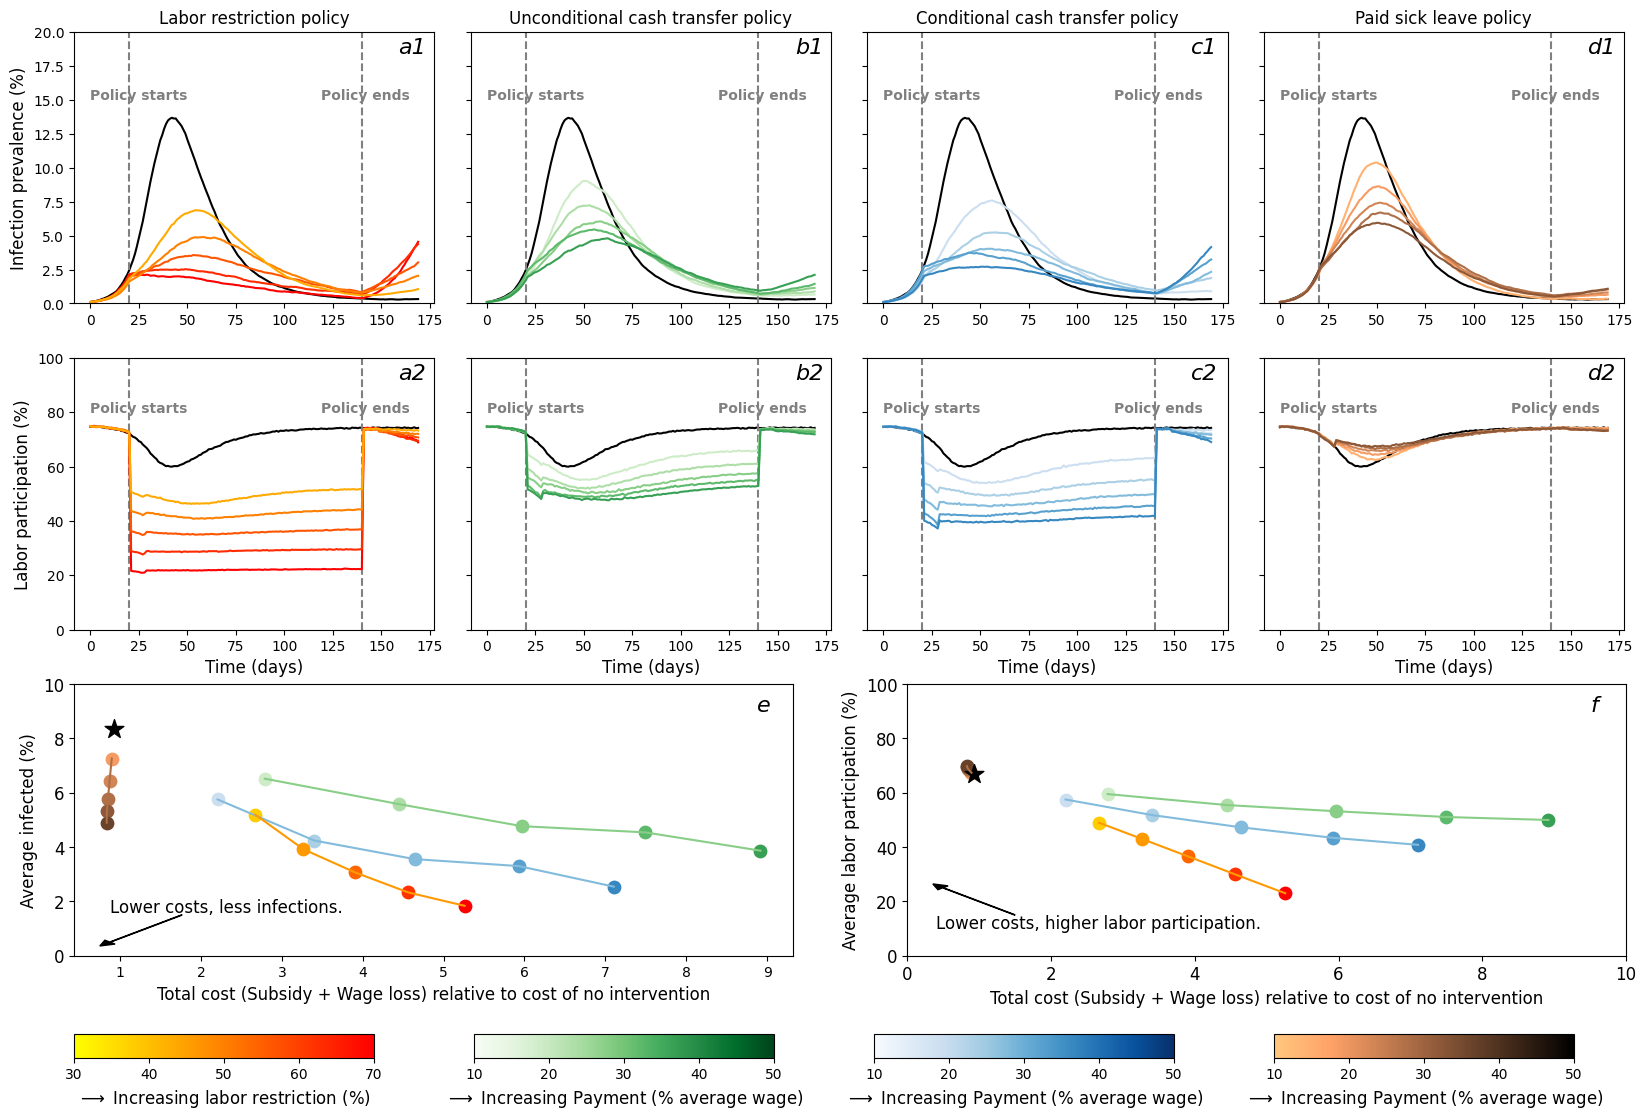

In [8]:
# Create figure
fig = plt.figure(figsize=(20, 12))

colors_list = []
for cmap in [plt.cm.autumn]:
    values = np.linspace(0, 1, 7)
    colors_list.append(cmap(values))

for cmap in [plt.cm.Greens, plt.cm.Blues, plt.cm.copper.reversed()]:
    values = np.linspace(0, 1, 10)
    colors_list.append(cmap(values))

# Define GridSpec: 2 rows, 6 columns
# This approach uses an invisible middle column to balance the width of plots
gs = gridspec.GridSpec(3, 4, wspace=0.1, hspace=0.2)
ax0 = fig.add_subplot(gs[0, :1]) 
ax1 = fig.add_subplot(gs[0, 1:2])
ax2 = fig.add_subplot(gs[0, 2:3])  
ax3 = fig.add_subplot(gs[0, 3:4])  

ax4 = fig.add_subplot(gs[1, :1]) 
ax5 = fig.add_subplot(gs[1, 1:2])
ax6 = fig.add_subplot(gs[1, 2:3])  
ax7 = fig.add_subplot(gs[1, 3:4]) 

# Second row - three plots, evenly distributed
ax8 = fig.add_subplot(gs[2, 0:2])  # Second row, spans first two columns
ax9 = fig.add_subplot(gs[2, 2:4])  # Second row, spans middle two columns
# ax5 = fig.add_subplot(gs[2, 4:])


for ax in [ax0, ax1, ax2, ax3]:
    ax.plot(df_base[df_base['infection_status'] == 'i'].groupby('time').sum()['count'][:170] * 100 / 16000, color='black')
    # axes[0, i].plot(df_base[df_base['infection_status'] == 'i'].groupby('time').sum()['count'][:170] * 100 / 16000, color='black')

for ax in [ax4, ax5, ax6, ax7]:
    ax.plot(df_base[df_base['risk_group'].str[:2] == 'g1'].groupby('time').sum()['count'][:170] * 100 / 16000, color='black', label='No labor restriction, Payment = 0')
    
for ax in [ax0, ax1, ax2, ax3]:
    ax.axvline(x=20, color='grey', linestyle='--')
    ax.text(0, 15, 'Policy starts', color='grey', weight='bold', fontsize=10)
    ax.axvline(x=140, color='grey', linestyle='--')
    ax.text(119, 15, 'Policy ends', color='grey', weight='bold', fontsize=10)

for ax in [ax4, ax5, ax6, ax7]:
    ax.axvline(x=20, color='grey', linestyle='--')
    ax.text(0, 80, 'Policy starts', color='grey', weight='bold', fontsize=10)
    ax.axvline(x=140, color='grey', linestyle='--')
    ax.text(119, 80, 'Policy ends', color='grey', weight='bold', fontsize=10)

### Forced behavior policy   
for i in range(len(work_pro_list)):
    ax0.plot(df_fb_pop[(df_fb_pop['work_pro'] == work_pro_list[i]) & (df_fb_pop['infection_status'] == 'i')]['time'][:170],
                    df_fb_pop[(df_fb_pop['work_pro'] == work_pro_list[i]) & (df_fb_pop['infection_status'] == 'i')]['count'][:170] * 100 / 16000,
                    color=colors_list[0][i], label=str(100 - work_pro_list[i] * 100) + '% labor restriction')
    ax4.plot(df_fb_decision_pop[(df_fb_decision_pop['work_pro'] == work_pro_list[i]) & (df_fb_decision_pop['Decision'] == 'g1')]['time'][:170],
                    df_fb_decision_pop[(df_fb_decision_pop['work_pro'] == work_pro_list[i]) & (df_fb_decision_pop['Decision'] == 'g1')]['count'][:170] * 100 / 16000,
                    color=colors_list[0][i])

ax0.set_title('Labor restriction policy', fontsize=12)
ax0.set_ylabel('Infection prevalence (%)', fontsize=12)
ax4.set_ylabel('Labor participation (%)', fontsize=12)

### Unconditional policy
for i in range(len(pay_uncon)):
    ax1.plot(df_uc_pop[(df_uc_pop['work_pro'] == pay_uncon[i]) & (df_uc_pop['infection_status'] == 'i')]['time'][:170],
                    df_uc_pop[(df_uc_pop['work_pro'] == pay_uncon[i]) & (df_uc_pop['infection_status'] == 'i')]['count'][:170] * 100 / 16000,
                    color=colors_list[1][i + 2], label='Payment = ' + str(round((100 * pay_uncon[i] / 180), 1)) + '(% average wage)')
    ax5.plot(df_uc_decision_pop[(df_uc_decision_pop['work_pro'] == pay_uncon[i]) & (df_uc_decision_pop['Decision'] == 'g1')]['time'][:170],
                    df_uc_decision_pop[(df_uc_decision_pop['work_pro'] == pay_uncon[i]) & (df_uc_decision_pop['Decision'] == 'g1')]['count'][:170] * 100 / 16000,
                    color=colors_list[1][i + 2])

ax1.set_title('Unconditional cash transfer policy', fontsize=12)

### Conditional policy
for i in range(len(pay_con)):
    ax2.plot(df_c_pop[(df_c_pop['work_pro'] == pay_con[i]) & (df_c_pop['infection_status'] == 'i')]['time'][:170],
                    df_c_pop[(df_c_pop['work_pro'] == pay_con[i]) & (df_c_pop['infection_status'] == 'i')]['count'][:170] * 100 / 16000,
                    color=colors_list[2][i + 2], label='Payment = ' + str(round((100 * pay_con[i] / 180), 1)) + '(% average wage)')
    ax6.plot(df_c_decision_pop[(df_c_decision_pop['work_pro'] == pay_con[i]) & (df_c_decision_pop['Decision'] == 'g1')]['time'][:170],
                    df_c_decision_pop[(df_c_decision_pop['work_pro'] == pay_con[i]) & (df_c_decision_pop['Decision'] == 'g1')]['count'][:170] * 100 / 16000,
                    color=colors_list[2][i + 2])

ax2.set_title('Conditional cash transfer policy', fontsize=12)

### Paid sick leave policy
for i in range(len(pay_ps)):
    ax3.plot(df_ps_pop[(df_ps_pop['work_pro'] == pay_ps[i]) & (df_ps_pop['infection_status'] == 'i')]['time'][:170],
                    df_ps_pop[(df_ps_pop['work_pro'] == pay_ps[i]) & (df_ps_pop['infection_status'] == 'i')]['count'][:170] * 100 / 16000,
                    color=colors_list[3][i + 1], label='Payment = ' + str(round((100 * pay_ps[i] / 180), 1)) + "%" + '(average wage)')
    ax7.plot(df_ps_decision_pop[(df_ps_decision_pop['work_pro'] == pay_ps[i]) & (df_ps_decision_pop['Decision'] == 'g1')]['time'][:170],
                    df_ps_decision_pop[(df_ps_decision_pop['work_pro'] == pay_ps[i]) & (df_ps_decision_pop['Decision'] == 'g1')]['count'][:170] * 100 / 16000,
                    color=colors_list[3][i + 1])

ax3.set_title('Paid sick leave policy', fontsize=12)

ax4.set_ylim(0, 100)  # Set the y-limit for the first subplot in the second row
ax5.set_ylim(0, 100)  # Set the y-limit for the second subplot in the second row
ax6.set_ylim(0, 100)  # Set the y-limit for the third subplot in the second row
ax7.set_ylim(0, 100)  # Set the y-limit for the fourth subplot in the second row

ax0.set_ylim(0, 20)  # Set the y-limit for the first subplot in the second row
ax1.set_ylim(0, 20)  # Set the y-limit for the second subplot in the second row
ax2.set_ylim(0, 20)  # Set the y-limit for the third subplot in the second row
ax3.set_ylim(0, 20)  # Set the y-limit for the fourth subplot in the second row

ax4.set_xlabel('Time (days)', fontsize=12)
ax5.set_xlabel('Time (days)', fontsize=12)
ax6.set_xlabel('Time (days)', fontsize=12)
ax7.set_xlabel('Time (days)', fontsize=12)

ax1.set_yticklabels([])
ax2.set_yticklabels([])
ax3.set_yticklabels([])

ax5.set_yticklabels([])
ax6.set_yticklabels([])
ax7.set_yticklabels([])


cmap_lr = plt.cm.autumn.reversed()
norm_sub = mcolors.Normalize(vmin=30, vmax=70)
sm_sub = cm.ScalarMappable(cmap=cmap_lr, norm=norm_sub)
sm_sub.set_array([])
cbar_ax_sub = fig.add_axes([0.1+0.025, 0.025, 0.15, 0.02])
cbar_1 = fig.colorbar(sm_sub, cax=cbar_ax_sub, orientation='horizontal')
cbar_1.set_label(r'$\longrightarrow$ Increasing labor restriction (%)', fontsize=12)

cmap_un = plt.cm.Greens
norm_un = mcolors.Normalize(vmin=10, vmax=50)
sm_un = cm.ScalarMappable(cmap=cmap_un, norm=norm_un)
sm_un.set_array([])
cbar_ax_un = fig.add_axes([0.3+0.025, 0.025, 0.15, 0.02])
cbar_2 = fig.colorbar(sm_un, cax=cbar_ax_un, orientation='horizontal')
cbar_2.set_label(r'$\longrightarrow$ Increasing Payment (% average wage)', fontsize=12)

cmap_con = plt.cm.Blues
norm_con = mcolors.Normalize(vmin=10, vmax=50)
sm_con = cm.ScalarMappable(cmap=cmap_con, norm=norm_con)
sm_con.set_array([])
cbar_ax_con = fig.add_axes([0.5+0.025, 0.025, 0.15, 0.02])
cbar_3 = fig.colorbar(sm_con, cax=cbar_ax_con, orientation='horizontal')
cbar_3.set_label(r'$\longrightarrow$ Increasing Payment (% average wage)', fontsize=12)

cmap_ps = plt.cm.copper.reversed()
norm_ps = mcolors.Normalize(vmin=10, vmax=50)
sm_ps = cm.ScalarMappable(cmap=cmap_ps, norm=norm_ps)
sm_ps.set_array([])
cbar_ax_ps = fig.add_axes([0.70+0.025, 0.025, 0.15, 0.02])
cbar_4 = fig.colorbar(sm_ps, cax=cbar_ax_ps, orientation='horizontal')
cbar_4.set_label(r'$\longrightarrow$ Increasing Payment (% average wage)', fontsize=12)


##### Evaluation
no_intervention_cost = 13.6
total_cost_base = 12.647767083333292
day_start = 20
day_end = 80

pos8 = ax8.get_position()
pos9 = ax9.get_position()

# Increase the space between ax8 and ax9
ax8.set_position([pos8.x0, pos8.y0, pos8.width * 0.95, pos8.height])  # Reduce width of ax8
ax9.set_position([pos9.x0 + 0.02, pos9.y0, pos9.width * 0.95, pos9.height])

colors_list = []

for cmap in [plt.cm.autumn]:
    values = np.linspace(0, 1, 6)
    colors_list.append(cmap(values))

for cmap in [plt.cm.Greens, plt.cm.Blues, plt.cm.copper.reversed()]:
    values = np.linspace(0, 1, 10)
    colors_list.append(cmap(values))
    
i = 0
for policy in ['unconditional', 'conditional', 'paid_sick_leave']:
    j = 0
    cost = []
    infected = []
    labor = []
    for payment in [18, 36, 54, 72, 90]:
        total_cost = df_results_income[(df_results_income['Policy_type'] == policy) & \
                                (df_results_income['Payment'] == payment)]['total_cost']/no_intervention_cost
        average_infected = df_results_income[(df_results_income['Policy_type'] == policy) & \
                                            (df_results_income['Payment'] == payment)]['Average_infected']
        average_labor = df_results_income[(df_results_income['Policy_type'] == policy) & \
                                        (df_results_income['Payment'] == payment)]['Average_labor']

        ax8.scatter(total_cost, average_infected, 
                           color=colors_list[i+1][j+2], label='Payment = ' + str(round((100*payment/180), 1)) + '(% average wage)',
                           s=80)
        
        ax9.scatter(total_cost, average_labor, 
                           color=colors_list[i+1][j+2],
                           s=80)
        cost.append(total_cost)
        infected.append(average_infected)
        labor.append(average_labor)
            
        j += 1
    ax8.plot(cost, infected, color=colors_list[i+1][4])
    ax9.plot(cost, labor, color=colors_list[i+1][4])
    i += 1

i = 0
cost = []
infected = []
labor = []
  
for wb in [0.3, 0.4, 0.5, 0.6, 0.7]:
    # total_cost = 0
    policy = 'forced_behavior'
    total_cost = df_results_income[(df_results_income['Policy_type'] == policy) & \
                                (df_results_income['Payment'] == wb)]['total_cost']/no_intervention_cost
    average_infected = df_results_income[(df_results_income['Policy_type'] == policy) & \
                                        (df_results_income['Payment'] == wb)]['Average_infected']
    average_labor = df_results_income[(df_results_income['Policy_type'] == policy) & \
                                    (df_results_income['Payment'] == wb)]['Average_labor']
    
    ax8.scatter(total_cost, average_infected,
                          color=colors_list[0][i], label=str(100 - wb*100) + '% labor restriction',
                          s=80)
    ax9.scatter(total_cost, average_labor,
                            color=colors_list[0][i],
                            s=80)
    cost.append(total_cost)
    infected.append(average_infected)
    labor.append(average_labor)
    i += 1
    
ax8.plot(cost, infected, color=colors_list[0][3])
ax9.plot(cost, labor, color=colors_list[0][3])

ax8.scatter(total_cost_base/no_intervention_cost, 100*df_base[(df_base['time'] >= day_start)&(df_base['time'] <= day_end)&\
                               (df_base['infection_status'] == 'i')]['count'].sum()/((day_end - day_start)*16000), 
                               marker = '*', s = 200, color = 'black')

ax9.scatter(total_cost_base/no_intervention_cost, 100*df_base[(df_base['time'] >= day_start)&(df_base['time'] <= day_end)&\
                               (df_base['risk_group'].str[:2] == 'g1')]['count'].sum()/((day_end - day_start)*16000),
                               marker = '*', s = 200, color = 'black', label = 'No labor restriction \nSubsidy payment = 0')

ax8.set_xlabel('Total cost (Subsidy + Wage loss) relative to cost of no intervention', fontsize=12)
ax9.set_xlabel('Total cost (Subsidy + Wage loss) relative to cost of no intervention', fontsize=12)
ax8.set_ylabel('Average infected (%)', fontsize=12)
ax9.set_ylabel('Average labor participation (%)', fontsize=12)

ax8.set_ylim([0,10])
ax9.set_ylim([0,100])
ax9.set_xlim([0,10])

ax9.tick_params(axis='x', which='both', labelsize=12)
ax8.tick_params(axis='y', which='both', labelsize=12)
ax9.tick_params(axis='y', which='both', labelsize=12)

plt.text(0.95, 0.9, "e", transform=ax8.transAxes, fontstyle = 'italic', fontsize = 16)
plt.text(0.95, 0.9, "f", transform=ax9.transAxes, fontstyle = 'italic', fontsize = 16)

ax8.arrow(0.15, 0.15, -0.1, -0.1, head_width=0.02, head_length=0.02, 
              fc='black', ec='black', transform=ax8.transAxes)

plt.text(0.05, 0.16, "Lower costs, less infections.", transform=ax8.transAxes,  fontsize = 12, color = 'black')

ax9.arrow(0.15, 0.15, -0.1, 0.1, head_width=0.02, head_length=0.02, 
              fc='black', ec='black', transform=ax9.transAxes)

plt.text(0.04, 0.1, "Lower costs, higher labor participation.", transform=ax9.transAxes,  fontsize = 12, color = 'black')

plt.text(0.9, 0.92, "a1", transform=ax0.transAxes, fontstyle = 'italic', fontsize = 16)
plt.text(0.9, 0.92, "b1", transform=ax1.transAxes, fontstyle = 'italic', fontsize = 16)
plt.text(0.9, 0.92, "c1", transform=ax2.transAxes, fontstyle = 'italic', fontsize = 16)
plt.text(0.9, 0.92, "d1", transform=ax3.transAxes, fontstyle = 'italic', fontsize = 16)
plt.text(0.9, 0.92, "a2", transform=ax4.transAxes, fontstyle = 'italic', fontsize = 16)
plt.text(0.9, 0.92, "b2", transform=ax5.transAxes, fontstyle = 'italic', fontsize = 16)
plt.text(0.9, 0.92, "c2", transform=ax6.transAxes, fontstyle = 'italic', fontsize = 16)
plt.text(0.9, 0.92, "d2", transform=ax7.transAxes, fontstyle = 'italic', fontsize = 16)
plt.tight_layout()